In [18]:
from matplotlib import pyplot as plt
from itertools import groupby
import numpy as np
import cv2 as C
import os as os

In [19]:
flen = o.listdir('out_dir')
flen = [f for f in flen if f.endswith('.png')]
print(f"Found {len(flen)} images")

Found 98 images


In [20]:
lums = []
cache = {}

# for i in range(1, 2):
for i in range(1, len(flen) + 1):
  name = f'{i:03d}'
  img = C.imread(f'./out_dir/{name}.png', C.IMREAD_GRAYSCALE)

  # mean lum s.t. lum = sum_white (>200)
  lum = np.sum(img > 200)
  lums.append(lum)
  cache[name] = lum
mean, std = np.mean(lums), np.std(lums)

lums = [l for l in lums if l > mean + std]
# delete items in cache that are not in lums
for k in list(cache.keys()):
  if cache[k] < mean + std:
    del cache[k]

print(cache)

{'023': 99, '024': 125, '025': 127, '026': 90, '074': 96, '075': 154, '076': 224, '077': 249, '078': 216, '079': 171, '080': 107}


In [25]:
# cache will have values in ranges like 24, 25.., 29 or 72, ..., 75
# we need max in each range
lst = list(map(int, cache.keys()))
ranges = []
for _, g in groupby(enumerate(lst), lambda k: k[0] - k[1]):
  start = next(g)[1]
  end = list(v for _, v in g) or [start]
  ranges.append(range(start, end[-1] + 1))

print(ranges)

[range(23, 27), range(74, 81)]


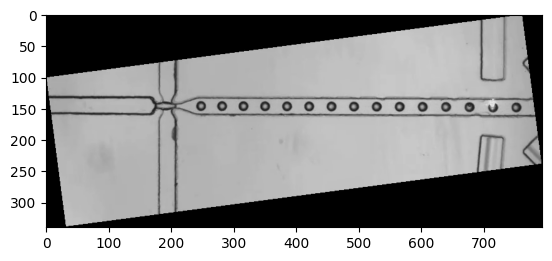

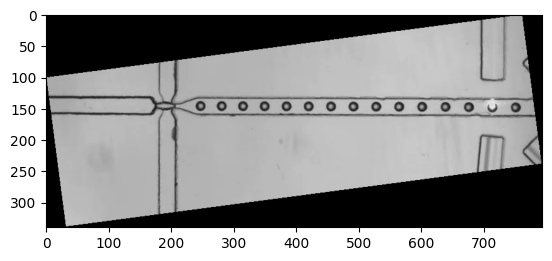

{25: 127, 77: 249}


In [31]:
# for each range, find the argmax
maxes = {}
for r in ranges:
  argmax = max(r, key=lambda k: cache[f"{k:03d}"])
  maxes[argmax] = cache[f"{argmax:03d}"]

  plt.imshow(C.imread(f'./in_dir/{argmax:03d}.png'))
  plt.show()

print(maxes)